### Exploração Dados de Voos

In [1]:
# Define required imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='deep')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
df_voos = pd.read_parquet('info_voos.parquet')

In [3]:
df_voos.head()

,IATA_origem,ICAO_origem,IATA_destino,ICAO_destino,data,partida_prevista,partida_real,chegada_prevista,chegada_real,cia_aerea,rota,duracao_prevista_voo,duracao_real_voo,atraso_chegada,atraso_partida,ano_partida,mes_partida,dia_partida,hora_partida,tempo_atraso,dia_semana,fim_de_semana,turno_partida,turno_chegada,feriado
0,REC,SBRF,POA,SBPA,01/01/2022,2022-01-01 17:45:00,2022-01-01 17:41:00,2022-01-01 22:05:00,2022-01-01 21:49:00,AZUL,REC_POA,-260.0,-248.0,False,False,2022,1,1,17,0 days 00:04:00,5,1,Tarde,Noite,1
1,REC,SBRF,POA,SBPA,02/01/2022,2022-01-02 17:25:00,2022-01-02 17:23:00,2022-01-02 21:50:00,2022-01-02 21:36:00,AZUL,REC_POA,-265.0,-253.0,False,False,2022,1,2,17,0 days 00:02:00,6,1,Tarde,Noite,0
2,REC,SBRF,POA,SBPA,03/01/2022,2022-01-03 02:25:00,2022-01-03 02:22:00,2022-01-03 06:45:00,2022-01-03 06:30:00,AZUL,REC_POA,-260.0,-248.0,False,False,2022,1,3,2,0 days 00:03:00,0,0,Madrugada,Manha,0
3,REC,SBRF,POA,SBPA,03/01/2022,2022-01-03 17:25:00,2022-01-03 17:22:00,2022-01-03 21:50:00,2022-01-03 21:29:00,AZUL,REC_POA,-265.0,-247.0,False,False,2022,1,3,17,0 days 00:03:00,0,0,Tarde,Noite,0
4,REC,SBRF,POA,SBPA,04/01/2022,2022-01-04 02:25:00,2022-01-04 02:20:00,2022-01-04 06:45:00,2022-01-04 06:29:00,AZUL,REC_POA,-260.0,-249.0,False,False,2022,1,4,2,0 days 00:05:00,1,0,Madrugada,Manha,0


In [4]:
df_voos = df_voos[
    df_voos["cia_aerea"].isin(['AZUL', 'GOL', 'TAM'])
]

Algumas perguntas para exploração inicial sobre o conjunto de dados.

**Perguntas**   
1. Quantas linhas e colunas o conjunto de dados tem?   
2. Quantos anos estão inclusos no conjunto de dados?   
3. Qual é o intervalo de datas do conjunto de dados?   
4. Quais companhias aéreas estão inclusas no conjunto de dados?   
5. Quais aeroportos de origem e destino estão incluídos?

In [5]:
print("O conjunto de dados têm {} linhas e {} colunas".format(
      df_voos.shape[0],  df_voos.shape[1]))
print("Os anos neste conjunto de dados são: ", 
      list(df_voos["ano_partida"].unique()))
print("Os meses cobertos neste conjunto de dados são: ", 
      sorted(list(df_voos["mes_partida"].unique())))
print("O intervalo de datas dos dados é:" ,
      min(df_voos["partida_prevista"]), " até ",
      max(df_voos["partida_prevista"]))
print("As companhias aéreas cobertas neste conjunto de dados são: ", 
      list(df_voos["cia_aerea"].unique()))
print("Quantidade de aeroportos de origem cobertos são: ", 
      df_voos["IATA_origem"].nunique())
print("Quantidade de aeroportos de destino cobertos são: ", 
      df_voos["IATA_destino"].nunique())

O conjunto de dados têm 607957 linhas e 25 colunas
Os anos neste conjunto de dados são:  [2022]
Os meses cobertos neste conjunto de dados são:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
O intervalo de datas dos dados é: 2022-01-01 00:05:00  até  2022-12-31 23:55:00
As companhias aéreas cobertas neste conjunto de dados são:  ['AZUL', 'GOL', 'TAM']
Quantidade de aeroportos de origem cobertos são:  51
Quantidade de aeroportos de destino cobertos são:  51


**Pergunta**: Quais são os 10 principais aeroportos de origem e destino com base no número de voos?

In [6]:
contagem = pd.DataFrame({'Origem': df_voos['IATA_origem'].value_counts(), 
                         'Destino': df_voos['IATA_destino'].value_counts()})

top_aeropostos = contagem.sort_values(by=['Origem'],
                                      ascending=False).head(10).reset_index().rename(columns=
                                                                                     {'index':'aeroporto_nome'})

df_count = pd.melt(top_aeropostos, id_vars=["aeroporto_nome"], 
                  var_name="Tipo", value_name="Quantidade")

top_aeropostos.to_parquet('top_10_aeroportos.parquet')

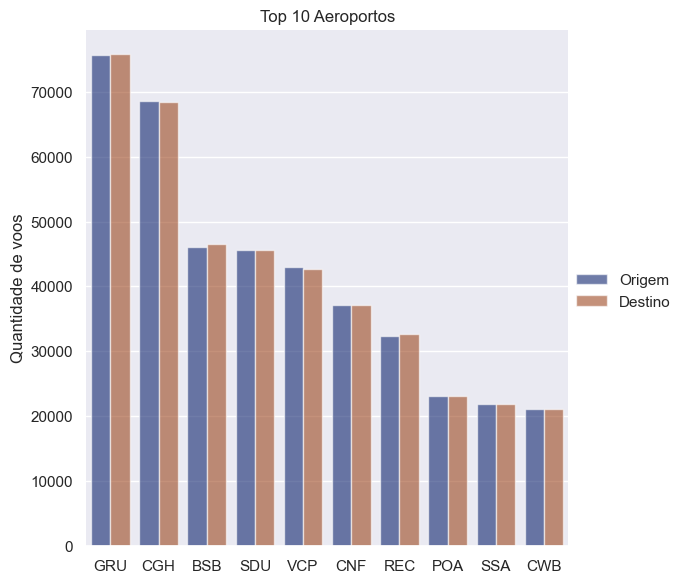

In [7]:
g = sns.catplot(
    data=df_count, kind="bar",
    x="aeroporto_nome", y="Quantidade", hue="Tipo",
    errorbar="sd", palette="dark", alpha=.6, height=6
).set(title='Top 10 Aeroportos')
g.despine(left=True)
g.set_axis_labels("", "Quantidade de voos")
g.legend.set_title("")

### Exploração Dataset Final

In [ ]:
dataset_final = pd.read_parquet('dataset_voos.parquet')

In [ ]:
dataset_final.head()

In [ ]:
dataset_final = dataset_final.drop(columns=['data','rota','chegada_prevista', 'chegada_real',
              'duracao_prevista_voo', 'duracao_real_voo','atraso_chegada','tempo_atraso', 
              'time', 'date', 'hour','IATA','hora'])

In [ ]:
dataset_final.info()

**Pergunta**: considerando todas as informações sobre um voo, você pode prever se ele atrasaria?

A coluna **atraso_partida** é uma variável indicadora que assume o valor 1 quando o atraso de chegada é superior a 15 minutos, 0 caso contrário. 

Essa coluna será o target para o problema de classificação.

### Distribuição dos Dados

#### Relação entre classe com atraso e sem atraso

In [ ]:
contagem_voos = (dataset_final.groupby('atraso_partida').size()/len(dataset_final))

print('No Horário: {:.2f}%'.format(contagem_voos[0] * 100))
print('Atrasado: {:.2f}%'.format(contagem_voos[1] * 100))

contagem_voos.plot(kind='bar')
plt.ylabel('Frequência')
plt.title('Distribuição de Classes')
plt.show()

Observamos que 86.85% dos voos chegam no horário, mas 13.15% não. Logo, há um desequilíbrio de classes.

**Perguntas**: 

- Quais meses têm mais atrasos?
- Qual dia do mês mais tem atrasos?
- Qual horário do dia tem mais atrasos?
- Qual dia da semana tem mais atrasos?
- Qual turno tem mais atrasos?
- Qual companhia aérea tem mais atrasos?
- Quais aeroportos de origem e destino têm mais atrasos?

In [ ]:
dia_da_semana_str = ['segunda-feira', 'terça-feira', 'quarta-feira', 
                     'quinta-feira', 'sexta-feira', 'sábado', 'domingo']

In [ ]:
dataset_final['dia_semana_nome'] = dataset_final['dia_semana'].apply(lambda x: dia_da_semana_str[x])

In [ ]:
viz_columns = ['mes_partida', 'dia_partida', 'hora_partida', 'dia_semana_nome', 'turno_partida', 'cia_aerea'] 

fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    column_sort = column if column != 'dia_semana_nome' else 'dia_semana'
    column_group = [column] if column != 'dia_semana_nome' else [column,'dia_semana']
    
    temp = dataset_final.groupby(column_group)['atraso_partida'].value_counts(normalize=True).rename('porcentagem').\
    mul(100).reset_index().sort_values(column_sort)
    sns.barplot(x=column, y="porcentagem", hue="atraso_partida", data=temp, ax=ax)
    plt.ylabel('% atraso/sem-atraso')
    

plt.show()

**Observações**
- Há um percentual maior de atraso no final do ano nos meses de Novembro(11) e Dezembro(12) e Janeiro (1).
- Os dias de maior atraso são 10, 11 e 16 do mês.
- O horário de 14 hs e 15 hs possuem maior atraso, seguido pelo horário de 22 hs.
- Os atrasos são maiores no período da noite e a tarde.
- Quinta-feira e Sexta-feira têm atrasos relativamente maiores do que os demais dias.
- A cia aérea de maior atraso é a GOL.

### Relações entrea as variáveis

In [ ]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(dataset_final.corr(), ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(12, 12))
## Correlation coefficient using different methods
corr1 = dataset_final.corr('pearson')[['atraso_partida']].sort_values(by='atraso_partida', ascending=False)
corr2 = dataset_final.corr('spearman')[['atraso_partida']].sort_values(by='atraso_partida', ascending=False)
corr3 = dataset_final.corr('kendall')[['atraso_partida']].sort_values(by='atraso_partida', ascending=False)

#setting titles for each plot
ax[0].set_title('Método Pearson')
ax[1].set_title('Método Spearman')
ax[2].set_title('Método Kendall')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

### Densidade de Variáveis

In [ ]:
numeric_cols = ['mes_partida', 'hora_partida','dia_semana', 'temperature_2m',
                'precipitation', 'rain', 'cloudcover', 'cloudcover_low'
               ]

In [ ]:
dataset_final[numeric_cols].plot(kind='density',figsize=(20,20),
                    subplots=True,layout=(6,2),
                    title="Densidade de Features Numéricas",sharex=False)
plt.show()

In [ ]:
numeric_cols = ['cloudcover_mid', 'cloudcover_high', 
                'windspeed_10m', 'windspeed_100m','elevation', 'weathercode']

dataset_final[numeric_cols].plot(kind='density',figsize=(20,20),
                    subplots=True,layout=(6,2),
                    title="Densidade de Features Numéricas",sharex=False)
plt.show()